# Project 10 - Visualization - Wilfredo Aaron Sosa Ramos

#Data Engineering Lifecycle

#Phase 1: Ingestion

In [1]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/Project 10/dataset/abalone.csv')

# Phase 2: Transformation

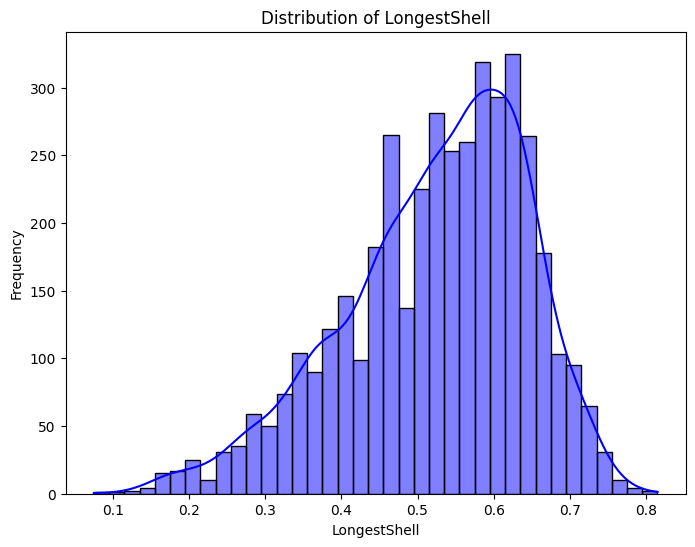

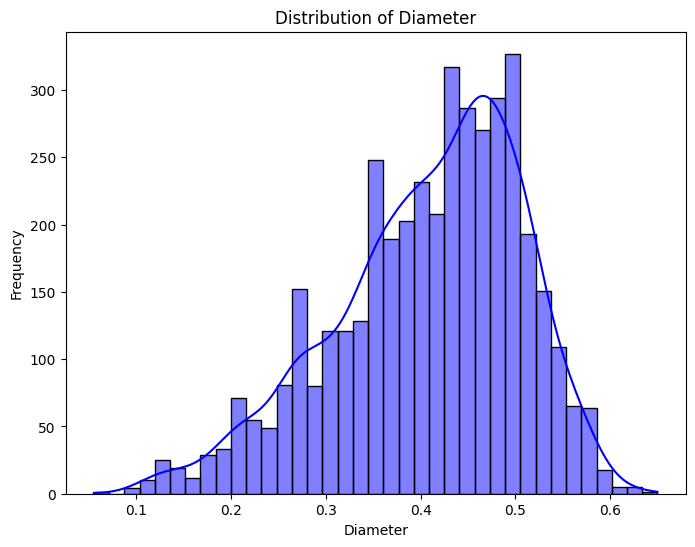

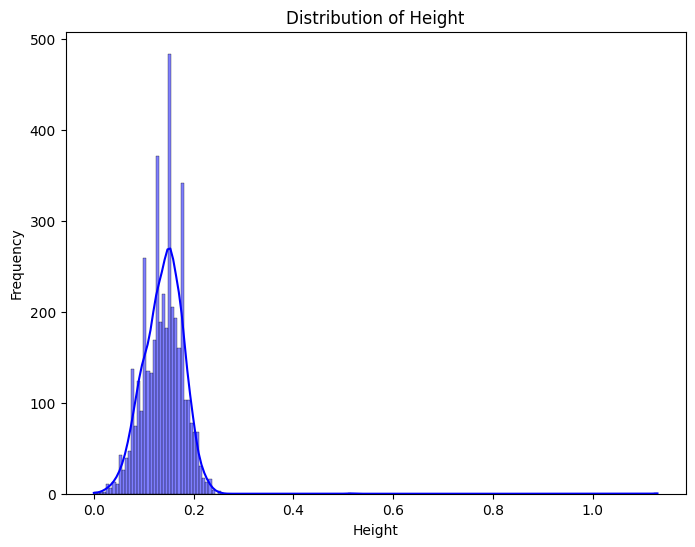

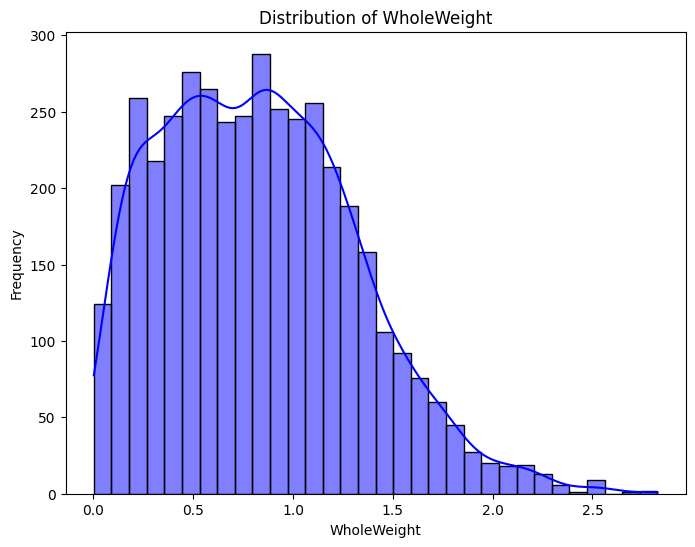

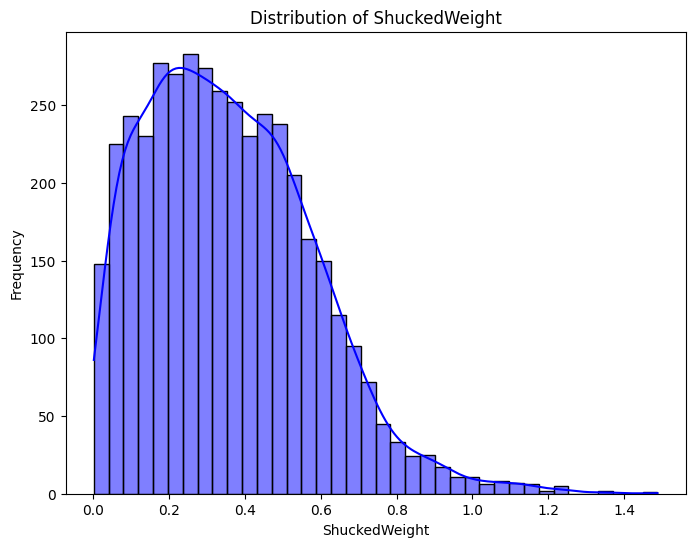

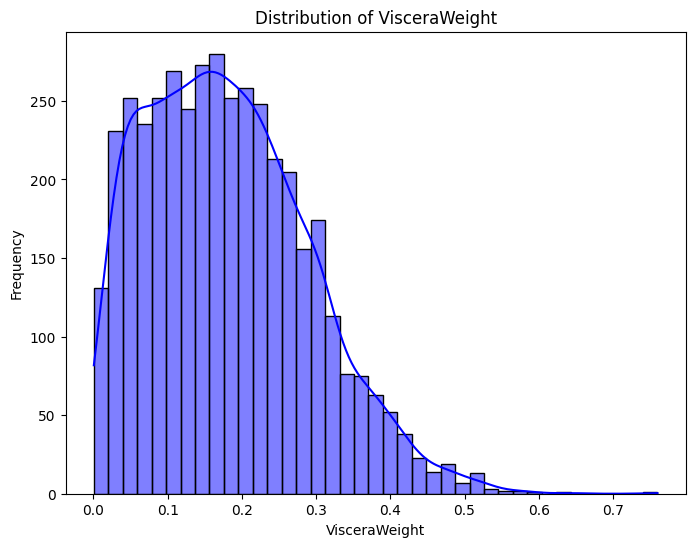

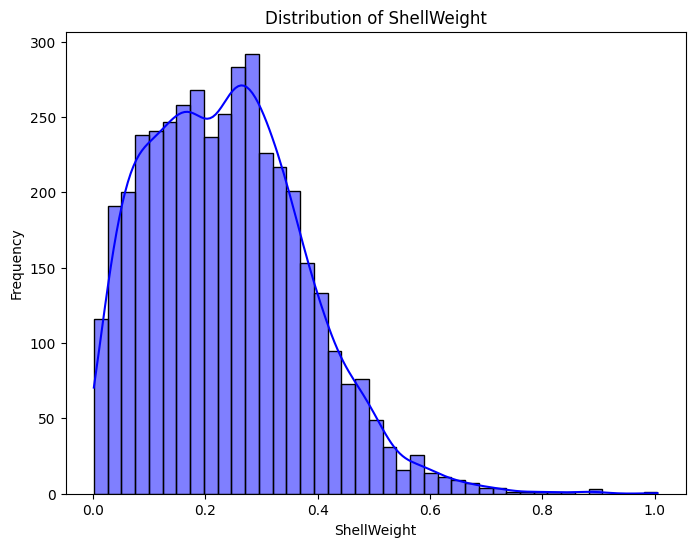

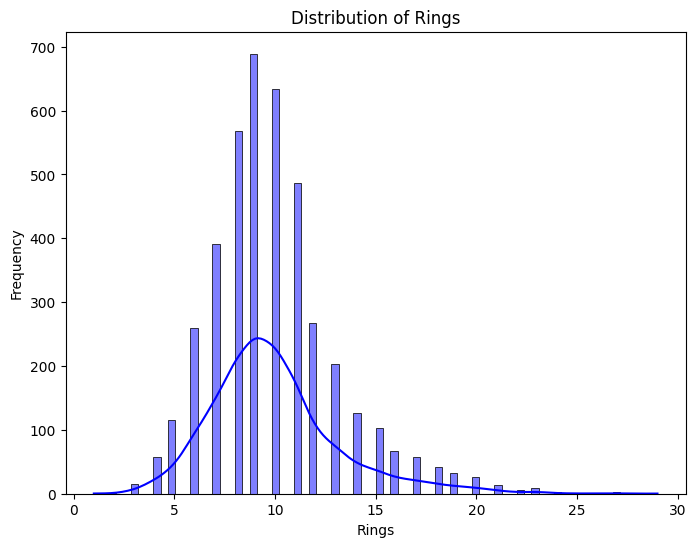

<ipython-input-3-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


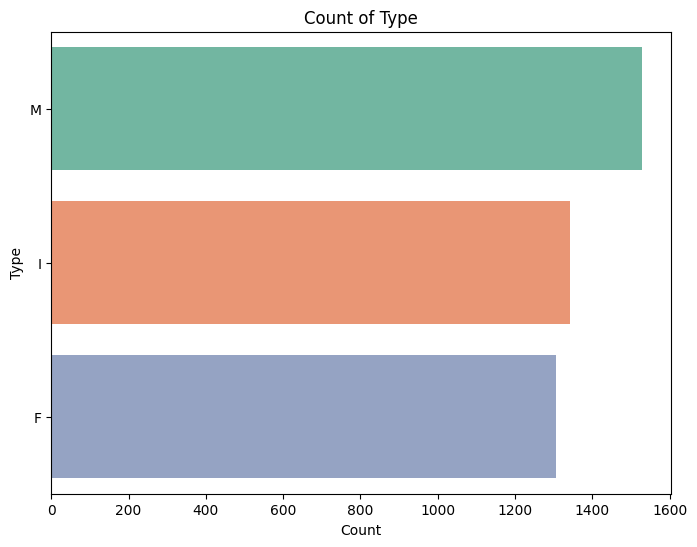

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [4]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [7]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features)
    ])

In [9]:
df_encoded = preprocessor.fit_transform(df)

In [10]:
new_column_names = preprocessor.named_transformers_['cat'] \
    .named_steps['encoder'].get_feature_names_out(input_features=cat_features)

In [11]:
new_column_names

array(['Type_F', 'Type_I', 'Type_M'], dtype=object)

In [12]:
columns = df.columns.tolist()

In [13]:
columns

['Type',
 'LongestShell',
 'Diameter',
 'Height',
 'WholeWeight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Rings']

In [14]:
columns.remove("Type")

In [15]:
columns

['LongestShell',
 'Diameter',
 'Height',
 'WholeWeight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Rings']

In [16]:
columns.extend(new_column_names.tolist())

In [17]:
columns

['LongestShell',
 'Diameter',
 'Height',
 'WholeWeight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Rings',
 'Type_F',
 'Type_I',
 'Type_M']

In [18]:
df_encoded = pd.DataFrame(df_encoded, columns=columns)

In [19]:
df_encoded.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Type_F,Type_I,Type_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0.0,1.0,0.0


In [20]:
X = df_encoded.drop("Type_F", axis=1)
y = df_encoded["Type_F"]

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Phase 3: Serving

#t-distributed Stochastic Neighbor Embedding (t-SNE)

Only in 2 components

In [22]:
from sklearn.manifold import TSNE
import time

tsne = TSNE(n_components = 2, random_state = 42)
t0 = time.time()
X_reduced = tsne.fit_transform(X_train)
t1 = time.time()

t1-t0

16.953726768493652

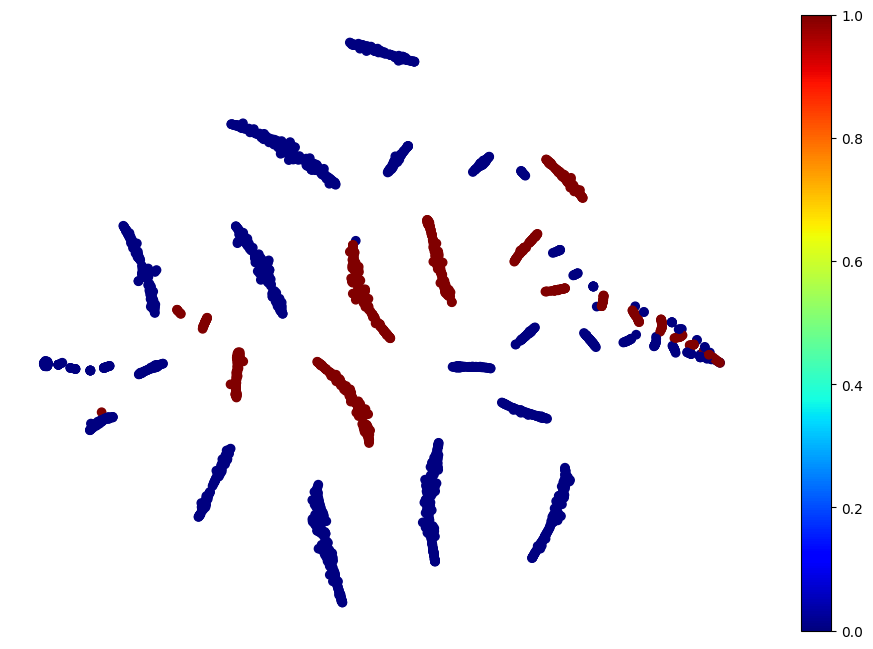

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y_train, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

Only 0 and 1

In [24]:
idx = (y_train == 0) | (y_train == 1)
X_subset = X_train[idx]
y_subset = y_train[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

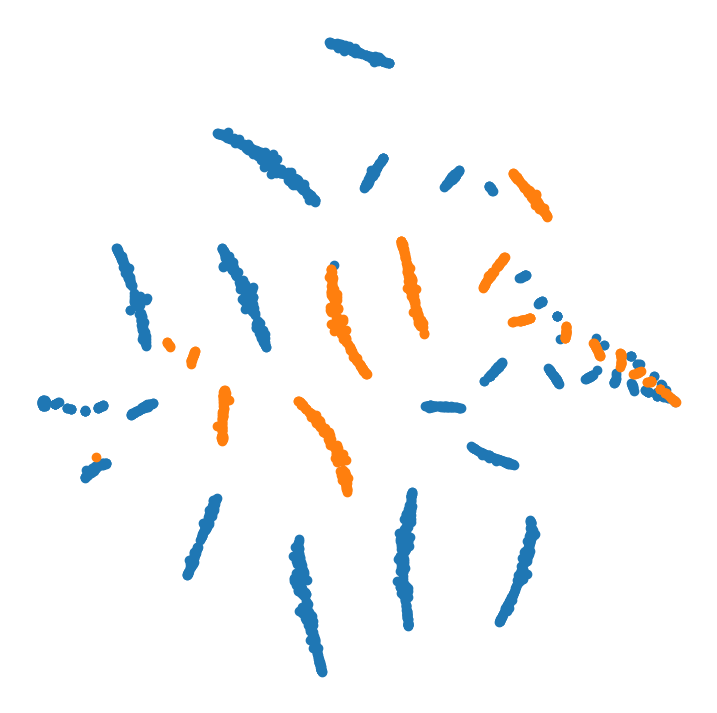

In [25]:
plt.figure(figsize=(9,9))
for digit in (0, 1):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1] )
plt.axis('off')
plt.show()

# PCA Visualization

0.017858505249023438


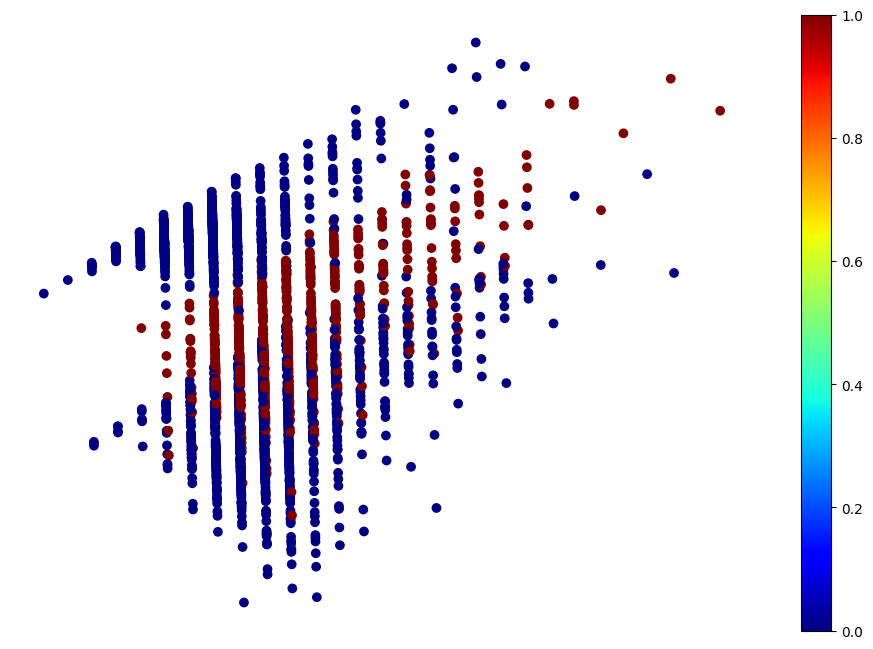

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
t0 = time.time()
X_pca = pca.fit_transform(X_train)
t1 = time.time()
print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_train, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

# PCA + T-SNE

16.246960163116455


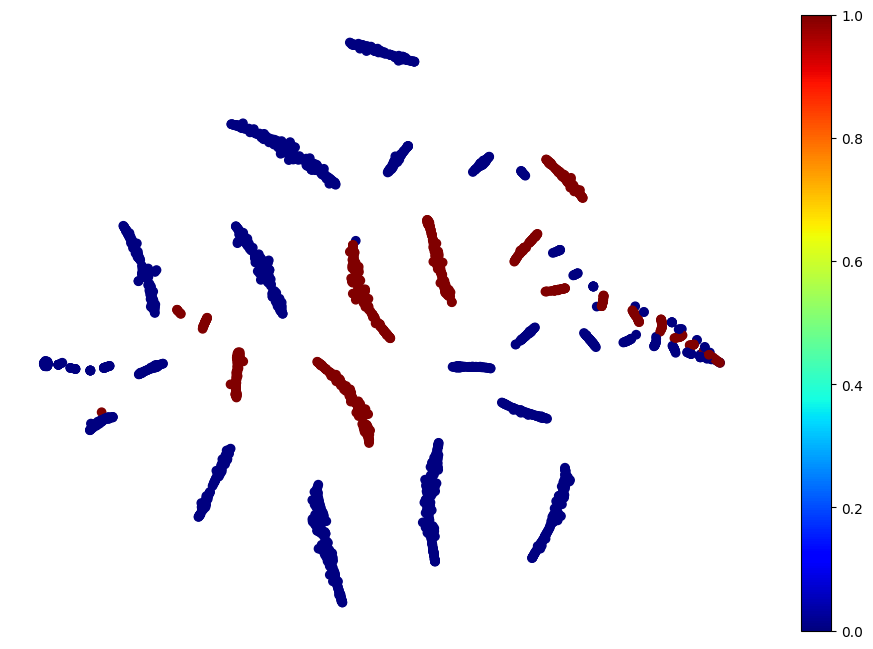

In [27]:
from sklearn.pipeline import Pipeline

pca_tsne = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('tsne', TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne = pca_tsne.fit_transform(X_train)
t1 = time.time()
print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y_train, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

# Locally Linear Embedding (LLE)

1.1283929347991943


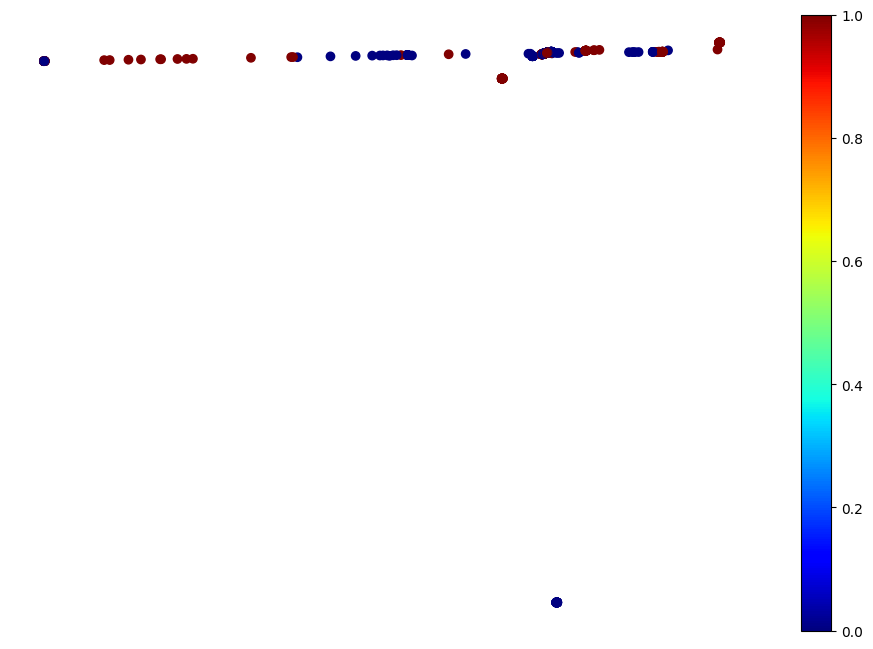

In [28]:
from sklearn.manifold import LocallyLinearEmbedding
t0 = time.time()
X_lle = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_train)
t1 = time.time()
print(t1 - t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_lle[:,0], X_lle[:,1], c = y_train, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

#PCA + LLE

6.2928078174591064


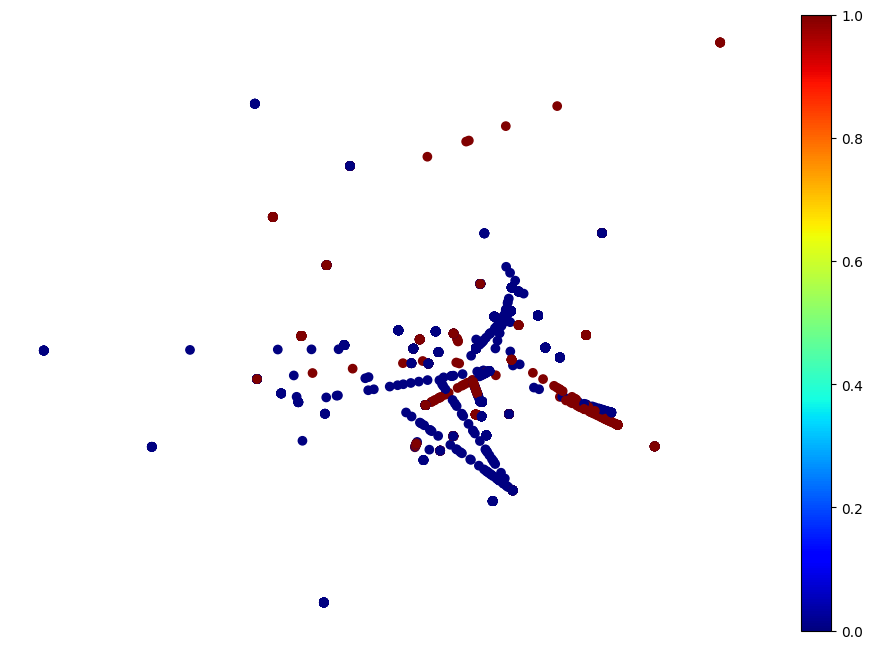

In [30]:
pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42, eigen_solver='dense')),
])
t0 = time.time()
X_pca_lle = pca_lle.fit_transform(X_train)
t1 = time.time()
print(t1-t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca_lle[:,0], X_pca_lle[:,1], c = y_train, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

#Linear Discriminant Analysis (LDA)

In [34]:
import numpy as np

n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

In [35]:
n_classes

2

0.011387825012207031


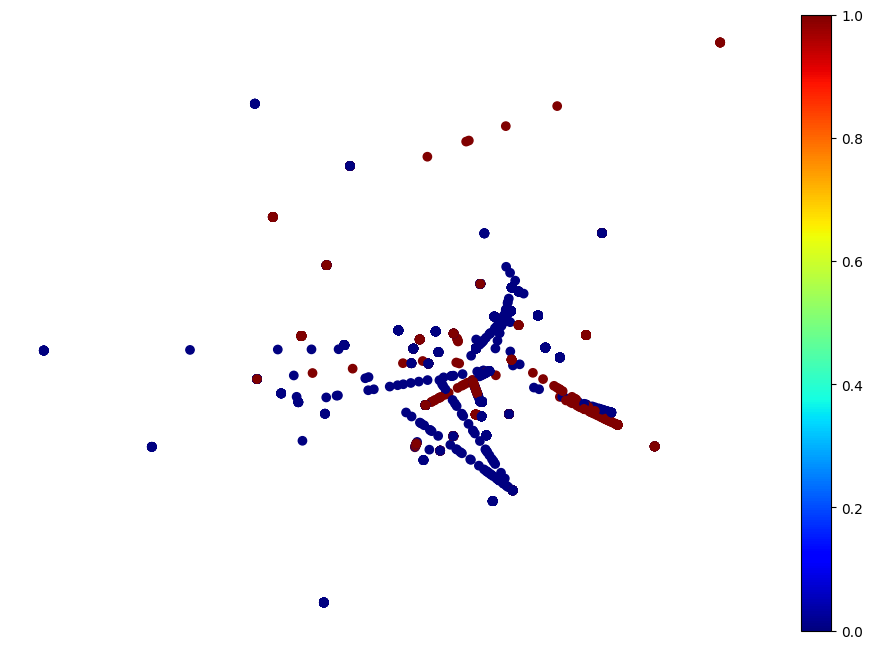

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

max_components = min(n_features, n_classes - 1)

t0 = time.time()
X_lda = LinearDiscriminantAnalysis(n_components=max_components).fit_transform(X_train, y_train)
t1 = time.time()
print(t1 - t0)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca_lle[:,0], X_pca_lle[:,1], c = y_train, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()